In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preprocessed-twitter-dataset/preprocessed_twitter_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/preprocessed-twitter-dataset/preprocessed_twitter_data.csv')

In [3]:
negative_tweets = df[df['sentiment'] == 0].head(500000)
print(negative_tweets.shape)
print(negative_tweets)

(500000, 3)
        Unnamed: 0                                              tweet  \
0                0  upset updat facebook text might cri result sch...   
1                1       dive mani time ball manag save rest go bound   
2                2                    whole bodi feel itchi like fire   
3                3                                      behav mad see   
4                4                                         whole crew   
...            ...                                                ...   
499995      499995                      idea use web p tweetdeck work   
499996      499996          ww work gain back probabl put chip anyway   
499997      499997                                   sorri mommi miss   
499998      499998     terribl headach last night weight decreas aaah   
499999      499999                                         cant sleep   

        sentiment  
0               0  
1               0  
2               0  
3               0  
4          

In [4]:
positive_tweets = df[df['sentiment'] == 1].head(500000)
print(positive_tweets.shape)
print(positive_tweets)

(500000, 3)
         Unnamed: 0                                              tweet  \
799999       799999                                  love u guy r best   
800000       800000      im meet one besti tonight cant wait girl talk   
800001       800001  thank twitter add sunisa got meet hin show dc ...   
800002       800002  sick realli cheap hurt much eat real food plu ...   
800003       800003                                     effect everyon   
...             ...                                                ...   
1299994     1299994                      watch horton hear tasha apart   
1299995     1299995      r u friendfe got friend request u sure realli   
1299996     1299996  thank comment grace record toast ice americano...   
1299997     1299997  look launch uniqu art web store uniqu art shir...   
1299998     1299998  new blog potenti cake diaster ahhhh www mandic...   

         sentiment  
799999           1  
800000           1  
800001           1  
800002         

In [5]:
neutral_tweets = df[df['sentiment'] == 2].head(10000)
print(neutral_tweets.shape)
print(neutral_tweets)

(10000, 3)
         Unnamed: 0                                              tweet  \
3123980     3123980                              top tablet damn right   
3123981     3123981              cnbctv appl margin better expect aapl   
3123987     3123987  rt bought store pretti good logo match wait in...   
3124000     3124002  latest appl product lead effici iphon ipad plu...   
3124005     3124007                              rt thank think upgrad   
...             ...                                                ...   
3141591     3141673   better anyon els busi stock invest tradeidea gnu   
3141592     3141674  rt sound eerili like famou julian robertson un...   
3141593     3141675  arent extrem optimist yet market go spx spi iw...   
3141594     3141676  case covid florida past week still set open pa...   
3141595     3141677  investor take chanc biogen stock biib rhhbi nv...   

         sentiment  
3123980          2  
3123981          2  
3123987          2  
3124000         

In [6]:
from sklearn.model_selection import train_test_split

# Split negative_tweets into train and test sets
train_negative_tweets, test_negative_tweets = train_test_split(negative_tweets, test_size=0.3, random_state=42)

# Split positive_tweets into train and test sets
train_positive_tweets, test_positive_tweets = train_test_split(positive_tweets, test_size=0.3, random_state=42)

# Split neutral_tweets into train and test sets
train_neutral_tweets, test_neutral_tweets = train_test_split(neutral_tweets, test_size=0.3, random_state=42)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle

# Combine the train sets for all sentiment categories and shuffle
train_tweets = shuffle(pd.concat([train_negative_tweets, train_positive_tweets, train_neutral_tweets], ignore_index=True), random_state=42)

# Combine the test sets for all sentiment categories and shuffle
test_tweets = shuffle(pd.concat([test_negative_tweets, test_positive_tweets, test_neutral_tweets], ignore_index=True), random_state=42)

# Handle NaN values in the 'text' column
train_tweets = train_tweets.dropna(subset=['tweet'])
test_tweets = test_tweets.dropna(subset=['tweet'])

# Get the normalized text reviews from the combined train and test sets
tweet_train_reviews = train_tweets['tweet'].tolist()
tweet_test_reviews = test_tweets['tweet'].tolist()

# Train lables and test lables of tweets
train_labels = train_tweets['sentiment']
test_labels = test_tweets['sentiment']

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(tweet_train_reviews)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(tweet_train_reviews)
test_sequences = tokenizer.texts_to_sequences(tweet_test_reviews)

# Ensure sequences are padded to the same length
maxlen = max(len(seq) for seq in train_sequences + test_sequences)
print("Maxlen: " , maxlen)
train_sequences = pad_sequences(train_sequences, maxlen=maxlen)
test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

2024-04-05 16:53:56.584256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 16:53:56.584331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 16:53:56.585848: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Maxlen:  56


Epoch 1/5
4399/4399 ━━━━━━━━━━━━━━━━━━━━ 1842s 417ms/step - accuracy: 0.7035 - loss: 0.5712 - val_accuracy: 0.7782 - val_loss: 0.4725
Epoch 2/5
4399/4399 ━━━━━━━━━━━━━━━━━━━━ 1829s 416ms/step - accuracy: 0.8013 - loss: 0.4373 - val_accuracy: 0.7737 - val_loss: 0.4786
Epoch 3/5
4399/4399 ━━━━━━━━━━━━━━━━━━━━ 1872s 414ms/step - accuracy: 0.8291 - loss: 0.3879 - val_accuracy: 0.7698 - val_loss: 0.5091
Epoch 4/5
4399/4399 ━━━━━━━━━━━━━━━━━━━━ 1798s 409ms/step - accuracy: 0.8481 - loss: 0.3454 - val_accuracy: 0.7662 - val_loss: 0.5259
Epoch 5/5
4399/4399 ━━━━━━━━━━━━━━━━━━━━ 1800s 409ms/step - accuracy: 0.8614 - loss: 0.3116 - val_accuracy: 0.7626 - val_loss: 0.5826


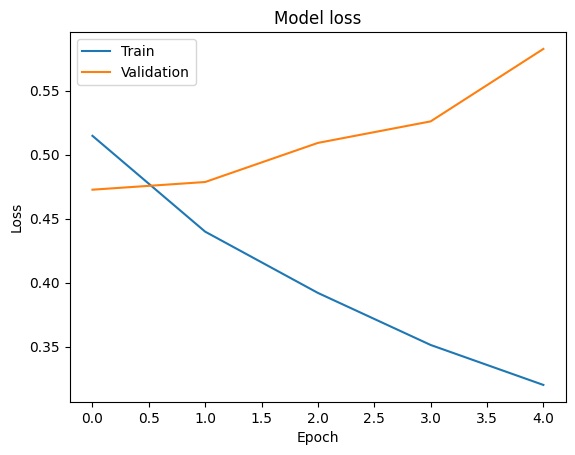

9424/9424 ━━━━━━━━━━━━━━━━━━━━ 301s 32ms/step - accuracy: 0.7665 - loss: 0.5790
9424/9424 ━━━━━━━━━━━━━━━━━━━━ 288s 31ms/step
Test Accuracy: 0.7668784856796265
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76    149303
           1       0.76      0.78      0.77    149237
           2       0.89      0.77      0.83      2998

    accuracy                           0.77    301538
   macro avg       0.81      0.77      0.79    301538
weighted avg       0.77      0.77      0.77    301538

Confusion Matrix:
[[112994  36181    128]
 [ 33153 115926    158]
 [   238    437   2323]]


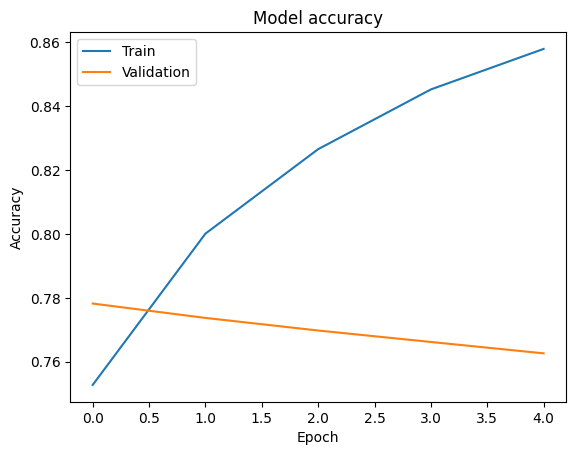

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
# Assuming you have already defined vocab_size, embedding_dim, maxlen, train_sequences, and train_labels
# ...
vocab_size = len(tokenizer.word_index) + 1  # add 1 for the padding token
embedding_dim = 200  # adjust as needed


# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(train_sequences, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_labels)

# Get predictions
predictions = model.predict(test_sequences)
predicted_labels = [np.argmax(pred) for pred in predictions]

# Print accuracy
print("Test Accuracy:", test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, predicted_labels))



In [9]:
model.save('modelfinal1.h5') #model3.h5